In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect
from sqlalchemy import desc

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Explanation of my approach to completing the first section

* We begin with a sqlite database that contains a few tables of specific interest. This time, we import the entire dataset, and go after making a larger dataframe that contains ALL of the information in the SQL database, and then after that, carry out most of the pruning, munging, etc. on that dataframe.

* Gonna take each database individually, and then join on the common data. Join them on Measurement.data and Station.data.

* 


In [11]:
prev_year_date  = dt.date(2017, 8, 23) - dt.timedelta(days=365)

measurement_full_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
session_full_data = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

## Loop to make lists. Then make the list a dict. 

In [12]:
meas_station_list=list()
meas_date_list=list()
meas_precip_list=list()
meas_tobs_list=list()
counter1=0
for row in measurement_full_data:
    counter1+=1
    meas_station_list.append(row.station)
    meas_date_list.append(row.date)
    meas_precip_list.append(row.prcp)
    meas_tobs_list.append(row.tobs)

measurement_full_dict={"station":meas_station_list,"date":meas_date_list,"precipitation":meas_precip_list,"temp":meas_tobs_list}        
        

### With the dict, can make several dataframes

### Dataframe 1: Full dataframe. Keep all the information as is

In [13]:
measurement_full_df = pd.DataFrame(measurement_full_dict)
measurement_full_df.head()

,station,date,precipitation,temp
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0


### Dataframe 2: Mean precipitation and temp by station: 

In [14]:
measurement_df_mean_by_station_funky = measurement_full_df.groupby("station").mean()
measurement_df_mean_by_station = measurement_df_mean_by_station_funky.reset_index()
measurement_df_mean_by_station.head()

,station,precipitation,temp
0,USC00511918,0.047971,71.615968
1,USC00513117,0.141921,72.689184
2,USC00514830,0.121058,74.873297
3,USC00516128,0.429988,70.915008
4,USC00517948,0.063602,74.684402


### Dataframe 3: Median precipitation and temp by station:

In [15]:
measurement_df_median_by_station_funky = measurement_full_df.groupby("station").median()
measurement_df_median_by_station = measurement_df_median_by_station_funky.reset_index()
measurement_df_median_by_station.head()

,station,precipitation,temp
0,USC00511918,0.00,72.0
1,USC00513117,0.02,73.0
2,USC00514830,0.02,75.0
3,USC00516128,0.16,71.0
4,USC00517948,0.00,75.0


### Dataframe 4: Sum precipitation by station

In [16]:
measurement_df_sum_by_station_funky = measurement_full_df.groupby("station").sum().drop('temp', axis = 1)
measurement_df_sum_by_station = measurement_df_sum_by_station_funky.reset_index()
measurement_df_sum_by_station.head()

,station,precipitation
0,USC00511918,92.68
1,USC00513117,382.62
2,USC00514830,234.49
3,USC00516128,1068.09
4,USC00517948,43.44


### Dataframe 5: Mean precipitation and temp by date: 

In [17]:
measurement_df_mean_by_date_funky = measurement_full_df.groupby(["date"]).mean()
measurement_df_mean_by_date = measurement_df_mean_by_date_funky.reset_index()
measurement_df_mean_by_date.head()


,date,precipitation,temp
0,2010-01-01,0.151429,69.714286
1,2010-01-02,0.002857,67.000000
2,2010-01-03,0.000000,74.000000
3,2010-01-04,0.001429,75.000000
4,2010-01-05,0.005000,74.500000


### Dataframe 6: Median precipitation and temp by date: 

In [18]:
measurement_df_median_by_date_funky = measurement_full_df.groupby(["date"]).median()
measurement_df_median_by_date = measurement_df_median_by_date_funky.reset_index()
measurement_df_median_by_date.head()


,date,precipitation,temp
0,2010-01-01,0.15,70.0
1,2010-01-02,0.00,65.0
2,2010-01-03,0.00,75.0
3,2010-01-04,0.00,75.0
4,2010-01-05,0.00,74.5


### Dataframe 7: Sum precipitation by date: 

In [19]:
measurement_df_sum_by_date_funky = measurement_full_df.groupby("date").sum().drop('temp', axis = 1)
measurement_df_sum_by_date = measurement_df_sum_by_date_funky.reset_index()
measurement_df_sum_by_date.head()

,date,precipitation
0,2010-01-01,1.06
1,2010-01-02,0.02
2,2010-01-03,0.00
3,2010-01-04,0.01
4,2010-01-05,0.03


## Make date columns 'datetime objects'

In [20]:
measurement_df_mean_by_date['date'] = pd.to_datetime(measurement_df_mean_by_date['date'], format='%Y-%m-%d')
measurement_df_median_by_date['date'] = pd.to_datetime(measurement_df_median_by_date['date'], format='%Y-%m-%d')
measurement_df_sum_by_date['date'] = pd.to_datetime(measurement_df_sum_by_date['date'], format='%Y-%m-%d')

# Dataframe list:

* We've got dataframes:
         measurement_full_df
         measurement_df_mean_by_station
         measurement_df_median_by_station
         measurement_df_sum_by_station
         measurement_df_mean_by_date (with good datetime format)
         measurement_df_median_by_date (with good datetime format)
         measurement_df_sum_by_date (with good datetime format)
            
## Now Providing plots for summed, median, and mean precipitation values

Text(0, 0.5, 'precipitation')

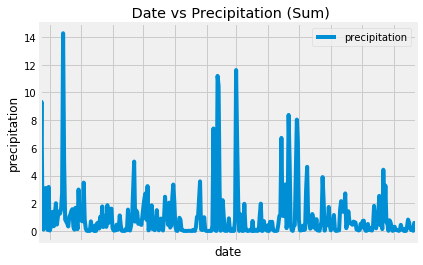

In [21]:
# Sort the dataframe by date
measurement_df_sum_by_date = measurement_df_sum_by_date.set_index(['date']).loc['2016-08-23':'2017-08-23']
measurement_df_sum_by_date = measurement_df_sum_by_date.reset_index()

measurement_df_sum_by_date.plot(x="date",y="precipitation",kind="line",title=" Date vs Precipitation (Sum)")
plt.tick_params(
   axis='x',          # changes apply to the x-axis
   which='both',      # both major and minor ticks are affected
   bottom=False,      # ticks along the bottom edge are off
   top=False,         # ticks along the top edge are off
   labelbottom=False)

plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

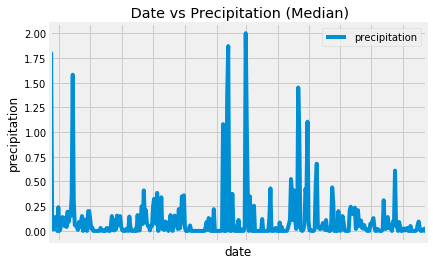

In [22]:
measurement_df_median_by_date = measurement_df_median_by_date.set_index(['date']).loc['2016-08-23':'2017-08-23']
measurement_df_median_by_date = measurement_df_median_by_date.reset_index()

measurement_df_median_by_date.plot(x="date",y="precipitation",kind="line",title=" Date vs Precipitation (Median)")
plt.tick_params(
   axis='x',          # changes apply to the x-axis
   which='both',      # both major and minor ticks are affected
   bottom=False,      # ticks along the bottom edge are off
   top=False,         # ticks along the top edge are off
   labelbottom=False)

plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

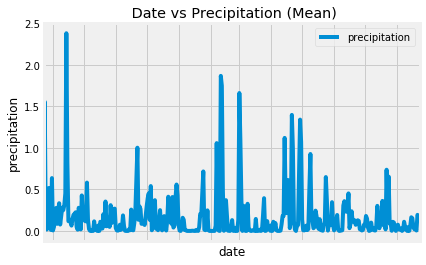

In [23]:
measurement_df_mean_by_date = measurement_df_mean_by_date.set_index(['date']).loc['2016-08-23':'2017-08-23']
measurement_df_mean_by_date = measurement_df_mean_by_date.reset_index()

measurement_df_mean_by_date.plot(x="date",y="precipitation",kind="line",title=" Date vs Precipitation (Mean)")
plt.tick_params(
   axis='x',          # changes apply to the x-axis
   which='both',      # both major and minor ticks are affected
   bottom=False,      # ticks along the bottom edge are off
   top=False,         # ticks along the top edge are off
   labelbottom=False)

plt.ylabel("precipitation")

## Row counts per station:

In [24]:
# List the stations and the counts in descending order.

measurement_full_df['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [31]:
# Design a query to show how many stations are available in this dataset?

measurement_df_mean_by_station.count()


station          9
precipitation    9
temp             9
dtype: int64

## Need min, max, and avg temp (of averages) for one station

In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

USC00519281_median_df = measurement_full_df.loc[measurement_full_df['station'] == 'USC00519281']

USC00519281_snapshot = [USC00519281_median_df['temp'].min(), USC00519281_median_df['temp'].max(), USC00519281_median_df['temp'].median()]
USC00519281_snapshot

[54.0, 85.0, 72.0]

In [44]:
measurement_df_mean_temp_by_date = measurement_df_mean_by_date.drop('precipitation', axis=1).set_index(['date']).loc['2016-08-23':'2017-08-23']

Text(0.5, 0, 'Temperature (in ºF)')

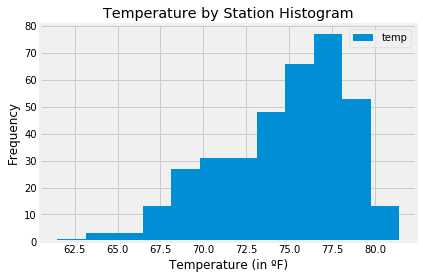

In [45]:
# Choose the station with the highest number of temperature observations. (USC00519281)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

measurement_df_mean_temp_by_date.plot(kind="hist", bins = 12)
plt.title("Temperature by Station Histogram (mean)")
plt.xlabel("Temperature (in ºF)")

In [ ]:
df_4.plot(kind="hist", bins = 12)
plt.title("Temperature by Station Histogram")
plt.xlabel("Temperature (in ºF)")

### Station DataTable as a DataFrame for later:

In [ ]:
station_full_data = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

sta_station_list=list()
sta_name_list=list()
sta_latitude_list=list()
sta_longitude_list=list()
sta_elevation_list=list()
counter2=0
for row in station_full_data:
    counter2+=1
    sta_station_list.append(row.station)
    sta_name_list.append(row.name)
    sta_latitude_list.append(row.latitude)
    sta_longitude_list.append(row.longitude)
    sta_elevation_list.append(row.elevation)

station_full_dict={"station":sta_station_list,"name":sta_name_list,"latitude":sta_latitude_list,"longitude":sta_longitude_list,"elevation":sta_elevation_list}

station_full_df = pd.DataFrame(station_full_dict)
station_full_df.head()